2211cs010188
S2-28
##  Mini Project on Employees Office Data
## Dataset : OfficeDataProject.csv
# Source :https://www.data.gov.in/resource/wholesale-price-index-base-year-2011-12-upto-may-2017
# Dataset Summary: WPI (Wholesale Price Index) 2011–2017
 Dataset Overview

Name: WPI-2011-12-May2017.csv

Shape: 869 rows × 76 columns

Period Covered: April 2011 – May 2017 (74 months)

Purpose: Measures inflation trends in wholesale markets in India.

 Columns

COMMODITIES

Name of commodity or group (e.g., All Commodities, Primary Articles, Wheat, Paddy, Jowar).

Includes aggregate groups (like "All Commodities") and detailed items (like "Paddy").

Weight

Relative importance in the overall WPI basket.

For example:

All Commodities = 100

Primary Articles = 22.6

Sub-items like Paddy, Wheat, Bajra have smaller weights.

Monthly Columns (Apr-11 … May-17)

Index values for each month.

Base year = 2011–12 (WPI = 100 in that year).

Example:

Apr-11: 97.1 (slightly below base year)

May-17: 112.8 (price increase since 2011).

 Dataset Highlights

Commodities Covered: 869 (very detailed breakdown).

Time Period: 6 years 2 months (April 2011 – May 2017).

Missing Values: Small number of NaNs (1–4 per column), dataset is clean overall.

In [1]:
import pandas as pd

df = pd.read_csv("WPI-2011-12-May2017.csv", encoding="latin1")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())
print("\nSample data:\n", df.head(10))


Shape: (869, 76)
Columns: ['COMMODITIES', 'Weight', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12', 'Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17']
Missing values:
 COMMODITIES    0
Weight         1
Apr-11         1
May-11         4
Jun-11         3
              ..
Jan-17         2
Feb-17         2
Mar-17         2
Apr-17         1
May-17         4
Leng

In [4]:
# Melt dataset into long format
df_long = df.melt(id_vars=["COMMODITIES", "Weight"],
                  var_name="Date", value_name="Index")

# Convert Date column into datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"], format="%b-%y")

print(df_long.head())


                       COMMODITIES     Weight       Date  Index
0                  All Commodities  100.00000 2011-04-01   97.1
1               I PRIMARY ARTICLES   22.61756 2011-04-01   95.2
2               (A). FOOD ARTICLES   15.25585 2011-04-01   94.1
3  a. FOOD GRAINS (CEREALS+PULSES)    3.46238 2011-04-01   97.5
4                      a1. CEREALS    2.82378 2011-04-01   98.5


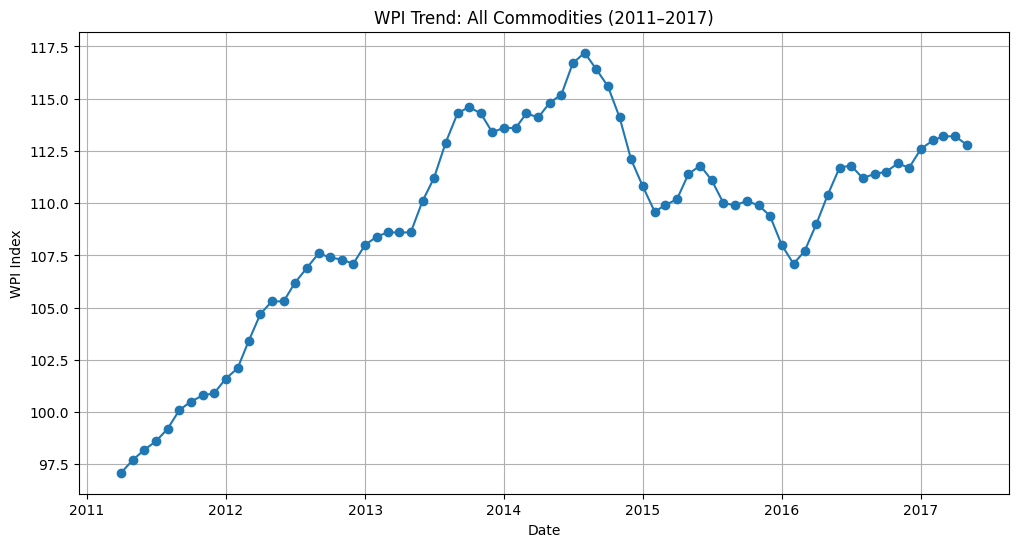

In [6]:
all_comm = df_long[df_long["COMMODITIES"] == "All Commodities"]

plt.figure(figsize=(12,6))
plt.plot(all_comm["Date"], all_comm["Index"], marker="o")
plt.title("WPI Trend: All Commodities (2011–2017)")
plt.xlabel("Date")
plt.ylabel("WPI Index")
plt.grid(True)
plt.show()


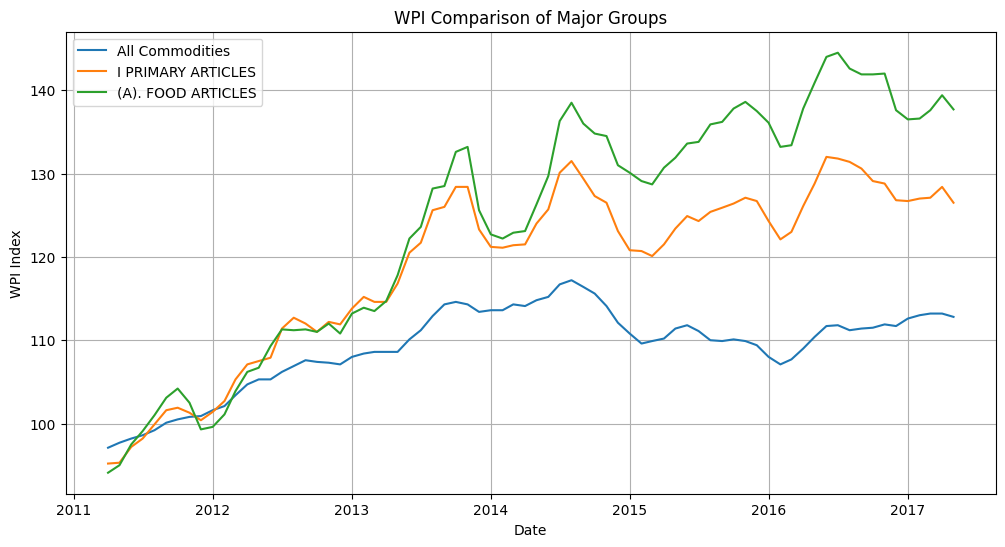

In [7]:
major_groups = ["All Commodities", "I PRIMARY ARTICLES", "(A). FOOD ARTICLES"]

plt.figure(figsize=(12,6))
for group in major_groups:
    temp = df_long[df_long["COMMODITIES"] == group]
    plt.plot(temp["Date"], temp["Index"], label=group)

plt.title("WPI Comparison of Major Groups")
plt.xlabel("Date")
plt.ylabel("WPI Index")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
growth = []
for comm in ["All Commodities", "(A). FOOD ARTICLES", "a1. CEREALS", "Wheat", "Paddy"]:
    temp = df_long[df_long["COMMODITIES"] == comm].sort_values("Date")
    start = temp.iloc[0]["Index"]
    end = temp.iloc[-1]["Index"]
    growth.append([comm, start, end, round(((end-start)/start)*100,2)])

growth_df = pd.DataFrame(growth, columns=["Commodity","Start_2011","End_2017","Growth_%"])
print("\nGrowth from 2011 to 2017:")
print(growth_df)



Growth from 2011 to 2017:
            Commodity  Start_2011  End_2017  Growth_%
0     All Commodities        97.1     112.8     16.17
1  (A). FOOD ARTICLES        94.1     137.7     46.33
2         a1. CEREALS        98.5     143.2     45.38
3               Wheat       101.1     137.5     36.00
4               Paddy        97.5     147.9     51.69


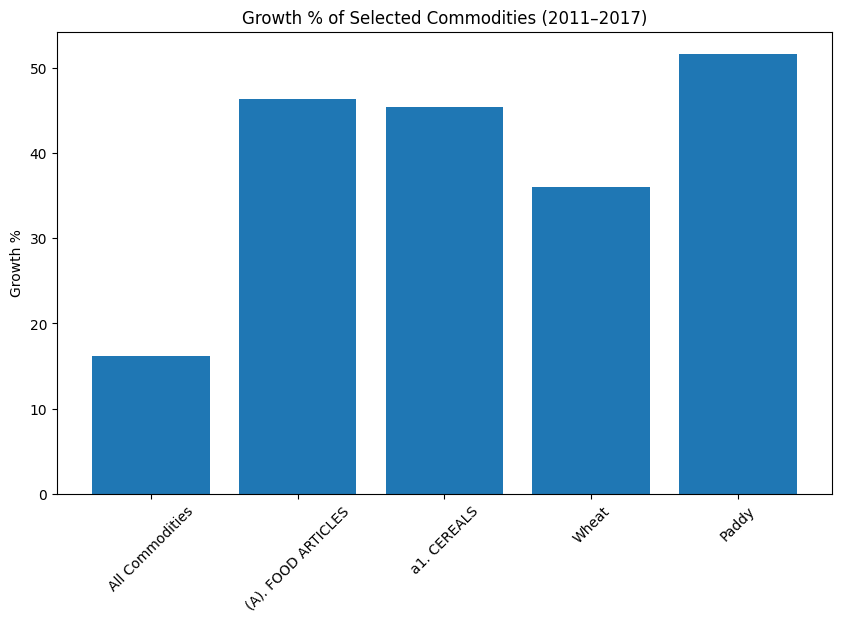

In [9]:
plt.figure(figsize=(10,6))
plt.bar(growth_df["Commodity"], growth_df["Growth_%"])
plt.title("Growth % of Selected Commodities (2011–2017)")
plt.ylabel("Growth %")
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

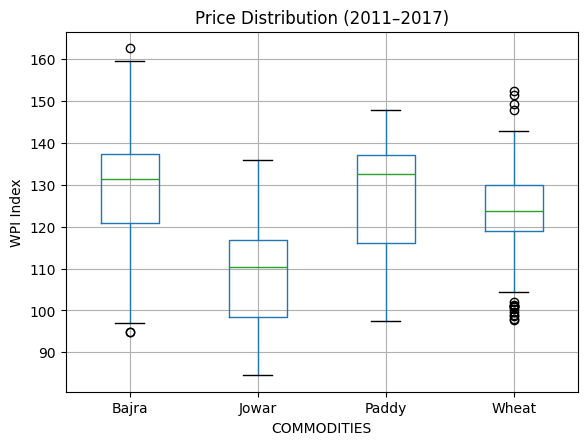

In [10]:
subset = df_long[df_long["COMMODITIES"].isin(["Wheat", "Paddy", "Jowar", "Bajra"])]

plt.figure(figsize=(10,6))
subset.boxplot(column="Index", by="COMMODITIES")
plt.title("Price Distribution (2011–2017)")
plt.suptitle("")   # remove extra title
plt.ylabel("WPI Index")
plt.show()


Yearly Average WPI (All Commodities):
 Year
2011     99.233333
2012    105.408333
2013    111.083333
2014    114.808333
2015    110.341667
2016    110.283333
2017    112.960000
Name: Index, dtype: float64


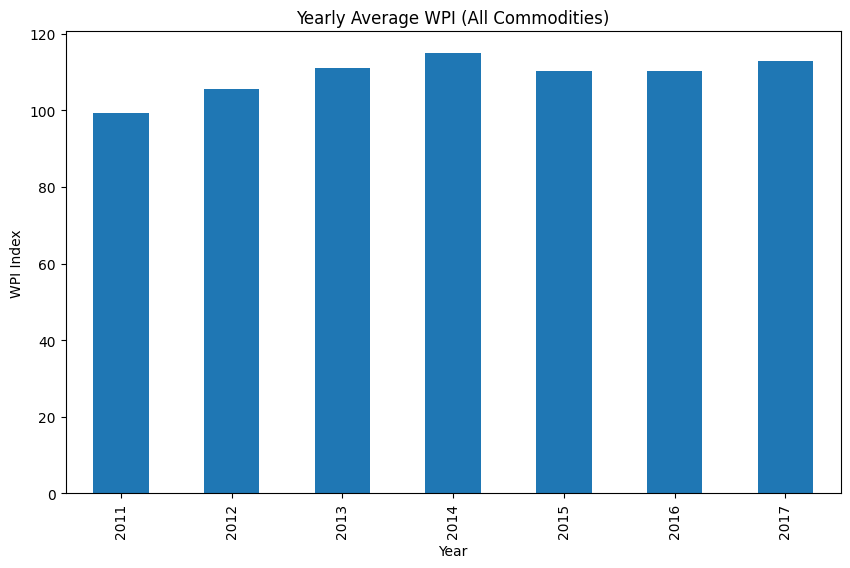

In [11]:
# Extract Year from Date
df_long["Year"] = df_long["Date"].dt.year

# Average WPI per year for All Commodities
yearly_avg = df_long[df_long["COMMODITIES"] == "All Commodities"].groupby("Year")["Index"].mean()

print("Yearly Average WPI (All Commodities):\n", yearly_avg)

# Plot
yearly_avg.plot(kind="bar", figsize=(10,6))
plt.title("Yearly Average WPI (All Commodities)")
plt.ylabel("WPI Index")
plt.show()


Monthly Seasonality (All Commodities):
 Month
1     109.100000
2     108.966667
3     109.516667
4     108.128571
5     108.714286
6     108.716667
7     109.266667
8     109.566667
9     109.950000
10    109.950000
11    109.716667
12    109.100000
Name: Index, dtype: float64


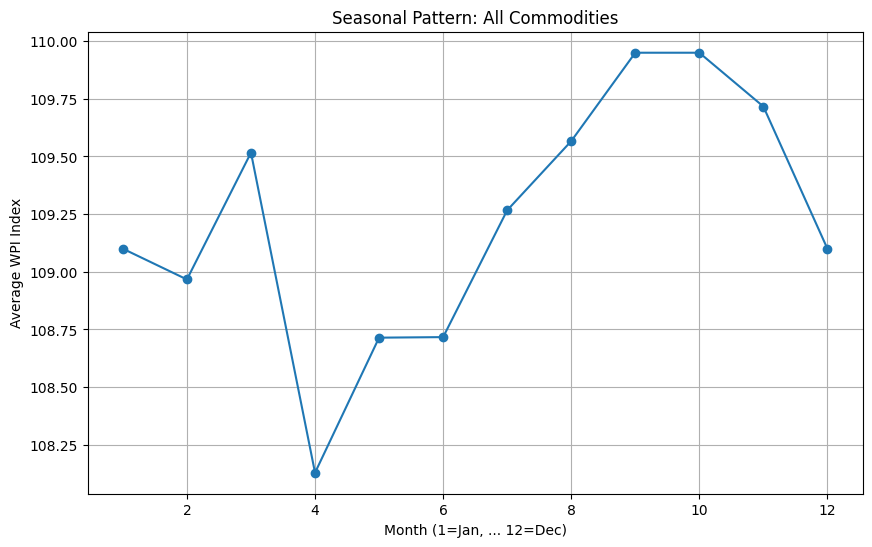

In [12]:
# Extract Month
df_long["Month"] = df_long["Date"].dt.month

# Average across years for each month (All Commodities)
monthly_pattern = df_long[df_long["COMMODITIES"] == "All Commodities"].groupby("Month")["Index"].mean()

print("Monthly Seasonality (All Commodities):\n", monthly_pattern)

# Plot
monthly_pattern.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Seasonal Pattern: All Commodities")
plt.xlabel("Month (1=Jan, ... 12=Dec)")
plt.ylabel("Average WPI Index")
plt.grid(True)
plt.show()


C:\Users\91630\AppData\Local\Temp\ipykernel_12492\1040119253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_comm["Inflation"] = all_comm["Index"].pct_change() * 100


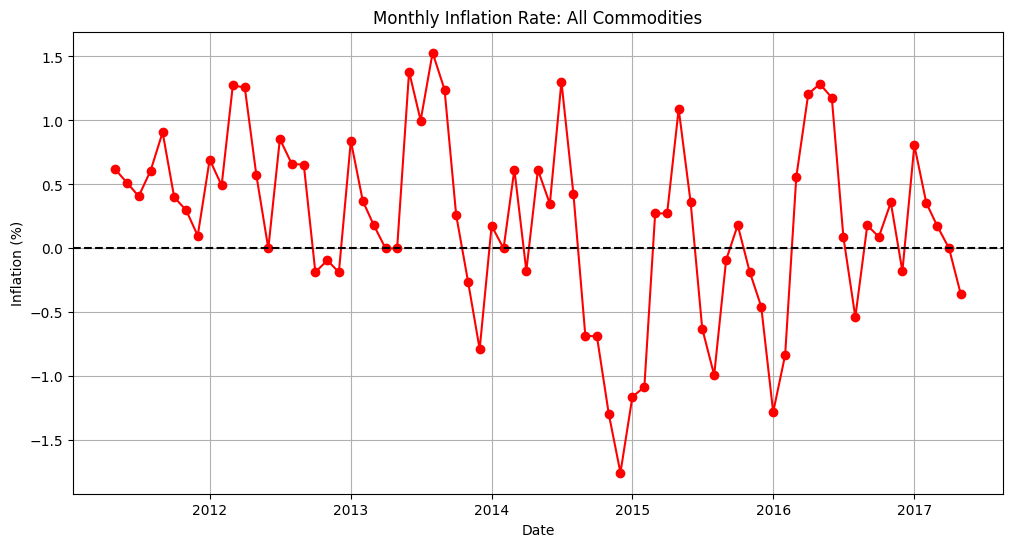

            Date  Index  Inflation
0     2011-04-01   97.1        NaN
869   2011-05-01   97.7   0.617920
1738  2011-06-01   98.2   0.511771
2607  2011-07-01   98.6   0.407332
3476  2011-08-01   99.2   0.608519
4345  2011-09-01  100.1   0.907258
5214  2011-10-01  100.5   0.399600
6083  2011-11-01  100.8   0.298507
6952  2011-12-01  100.9   0.099206
7821  2012-01-01  101.6   0.693756
8690  2012-02-01  102.1   0.492126
9559  2012-03-01  103.4   1.273262
10428 2012-04-01  104.7   1.257253
11297 2012-05-01  105.3   0.573066
12166 2012-06-01  105.3   0.000000


In [13]:
# Month-to-month percentage change (All Commodities)
all_comm["Inflation"] = all_comm["Index"].pct_change() * 100

plt.figure(figsize=(12,6))
plt.plot(all_comm["Date"], all_comm["Inflation"], color="red", marker="o")
plt.title("Monthly Inflation Rate: All Commodities")
plt.xlabel("Date")
plt.ylabel("Inflation (%)")
plt.axhline(0, color="black", linestyle="--")
plt.grid(True)
plt.show()

print(all_comm[["Date","Index","Inflation"]].head(15))


In [14]:
growth_all = []
commodities = df_long["COMMODITIES"].unique()

for comm in commodities:
    temp = df_long[df_long["COMMODITIES"] == comm].sort_values("Date")
    if len(temp) > 1:
        start = temp.iloc[0]["Index"]
        end = temp.iloc[-1]["Index"]
        if pd.notnull(start) and pd.notnull(end) and start != 0:
            growth_all.append([comm, round(((end-start)/start)*100,2)])

growth_all_df = pd.DataFrame(growth_all, columns=["Commodity","Growth_%"]).sort_values("Growth_%", ascending=False)

print("Top 10 Fastest Growing Commodities (2011–2017):")
print(growth_all_df.head(10))


Top 10 Fastest Growing Commodities (2011–2017):
                          Commodity  Growth_%
11                             Ragi    160.64
30                          Cabbage    133.18
13                             Gram    125.28
35                     Bitter gourd    125.19
37                            Beans    118.55
101                      Niger Seed    117.53
130                          Garnet    116.39
652  Scientific time keeping device    110.00
129                       Limestone    109.22
197             Gram powder (besan)    106.44


Correlation (Food Articles vs All Commodities): 0.821


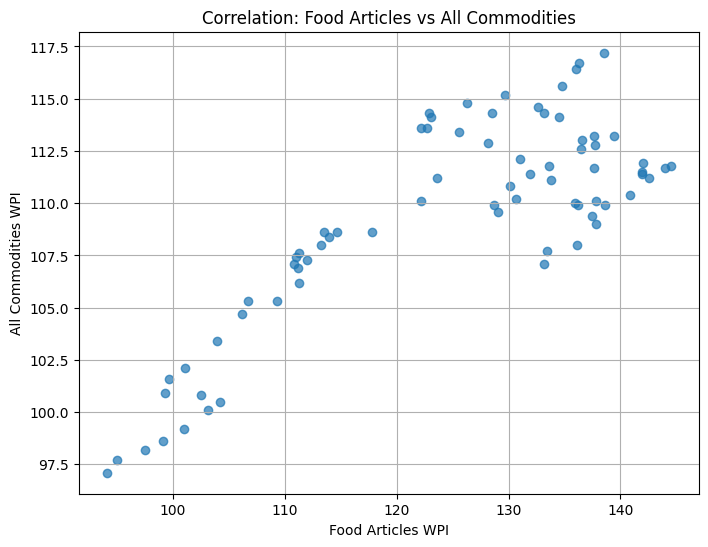

In [15]:
# Pivot to wide format again (Date × Commodity)
pivot_df = df_long.pivot_table(index="Date", columns="COMMODITIES", values="Index")

# Correlation between Food Articles & All Commodities
corr_value = pivot_df["(A). FOOD ARTICLES"].corr(pivot_df["All Commodities"])
print("Correlation (Food Articles vs All Commodities):", round(corr_value,3))

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(pivot_df["(A). FOOD ARTICLES"], pivot_df["All Commodities"], alpha=0.7)
plt.title("Correlation: Food Articles vs All Commodities")
plt.xlabel("Food Articles WPI")
plt.ylabel("All Commodities WPI")
plt.grid(True)
plt.show()


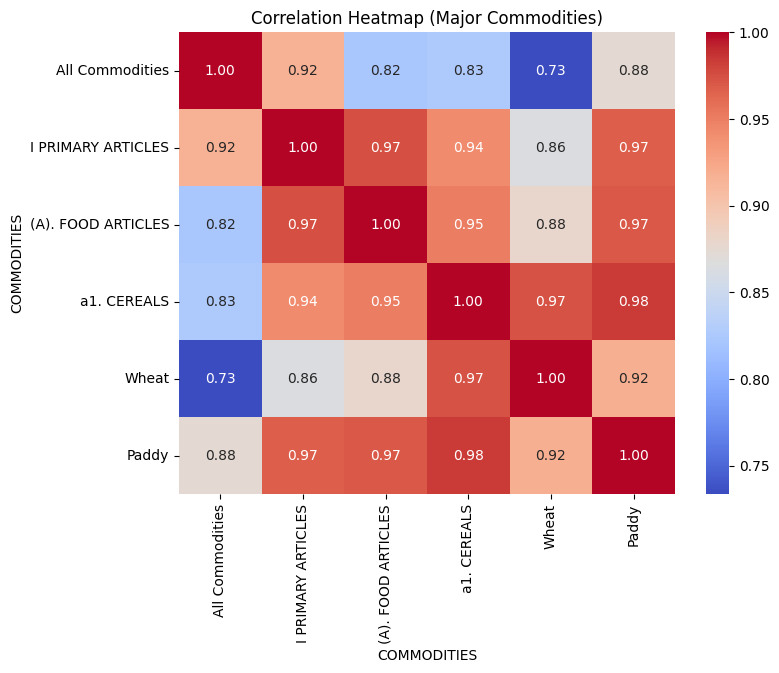

In [16]:
import seaborn as sns

major = ["All Commodities", "I PRIMARY ARTICLES", "(A). FOOD ARTICLES", "a1. CEREALS", "Wheat", "Paddy"]
corr_matrix = pivot_df[major].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Major Commodities)")
plt.show()
